# Tugas 2 AI Fuzzy Logic

##### Nama : Alfian Yulianto
##### NIM : 1301178160
##### Kelas : IF-40-GAB05

In [1]:
#List import sesuai keperluan dari program yang akan dibuat
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from random import randint

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#pemanggilan data dari file csv
dtrain = pd.read_csv("DataTugas2.csv")

x = dtrain[" Pendapatan"]
y = dtrain[" Hutang"]

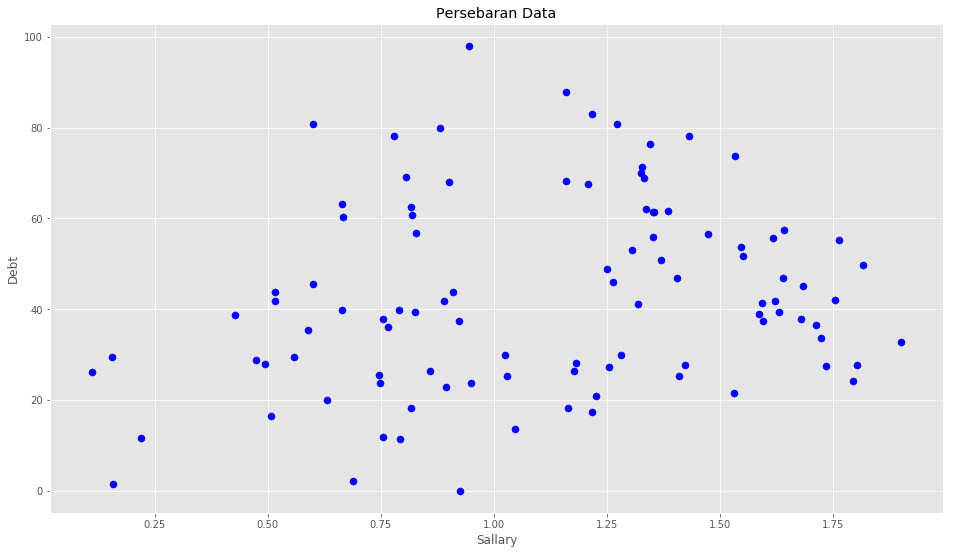

In [3]:
# persebaran Data
plt.title('Persebaran Data')
plt.xlabel('Sallary')
plt.ylabel('Debt')
plt.scatter(x, y, c='blue', s=50)

### Stage 1 Make Linguistic Measures
Variabel dan Value

Sallary : low, high, medium

Debt    : minor, major


In [4]:
vSallary = []
vDebt = []

### Stage 2 Membership
Membership from Sallary

######  Sallary Boundary
Low           : 0-0.5
Low to medium : >0.5-<0.75
Medium        : 0.75 - 1.25
Medium to high: >1.25 - <1.5
High          : 1.5 - 2.0

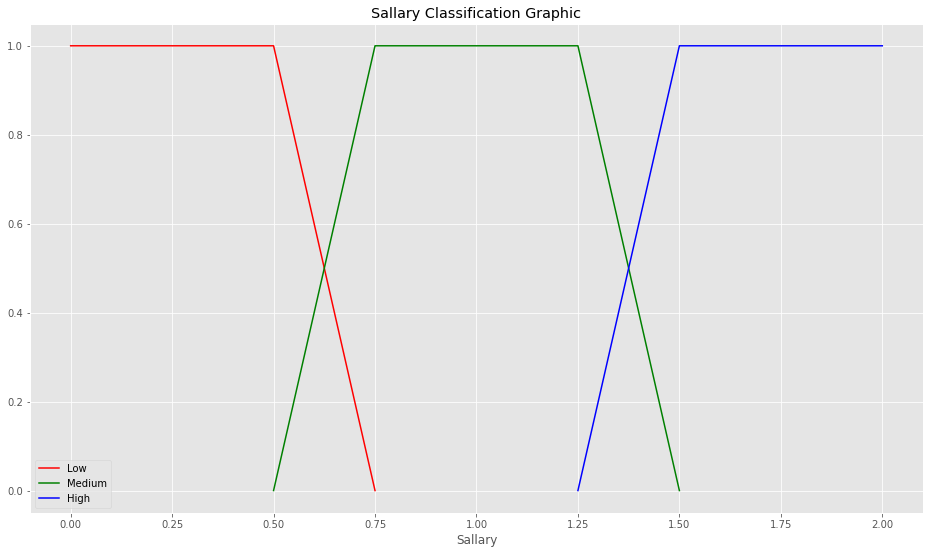

In [5]:
low_x=[0, 0.5, 0.75]
low_y=[1,1,0]

medium_x=[0.5,0.75,1.25,1.5]
medium_y=[0,1,1,0]

high_x=[1.25,1.5,2]
high_y=[0,1,1]

plt.plot(low_x,low_y, c='r', label="Low")
plt.plot(medium_x,medium_y, c='g', label='Medium')
plt.plot(high_x,high_y, c='b', label='High')
plt.title('Sallary Classification Graphic')
plt.xlabel('Sallary')
plt.legend()

Membership of Debt

######  Debt Boundary
Minor          :0.0.45
Minor to major :>0.45-<0.55
Major          :0.55-100

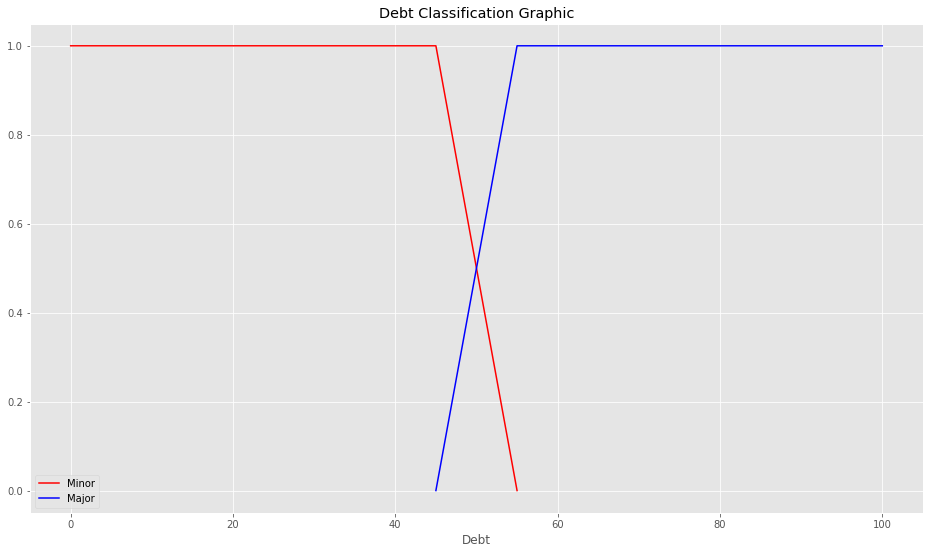

In [6]:
minor_x=[0, 45, 55]
minor_y=[1,1,0]

major_x=[45,55,100]
major_y=[0,1,1]

plt.plot(minor_x,minor_y, c='r', label="Minor")
plt.plot(major_x,major_y, c='b', label='Major')
plt.title('Debt Classification Graphic')
plt.xlabel('Debt')
plt.legend()

### stage 3 Fuzzification

In [7]:
def lowsallaryfuzzy(x):
    if (x<=0.5):
        return 1
    elif((x>0.5) and (0.75)):
        return abs((x-0.75)/(0.75-0.5))
    else:
        return 0

In [8]:
def mediumsallaryfuzzy(x):
    if((x>=0.5) and (x<0.75)):
        return abs((x-0.5)/(0.75-0.5))
    elif (x>=0.75) and (x<=1.25):
        return 1
    elif((x>1.25) and (x<1.5)):
        return abs((x-1.5)/(1.5-1.25))
    else:
        return 0

In [9]:
def highsallaryfuzzy(x):
    if (x>=1.5):
        return 1
    elif((x>1.25) and (x<1.5)):
        return abs((x-1.25)/(1.5-1.25))
    else:
        return 0

In [10]:
def sallaryfuzzification(x):
    vSallary.append([lowsallaryfuzzy(x), mediumsallaryfuzzy(x), highsallaryfuzzy(x)])

In [11]:
for a in range(len(x)):
    sallaryfuzzification(x[a])

In [12]:
def lowdebtfuzzy(y):
    if(y<=45):
        return 1
    elif((y>45) and (y<55)):
        return abs((y-55)-(55-45))
    else:
        return 0

In [13]:
def highdebtfuzzy(y):
    if(y>=55):
        return 1
    elif((y>45) and (y<55)):
        return abs((y-45)-(55-45))
    else:
        return 0

In [14]:
def debtfuzzification(y):
    vDebt.append([lowdebtfuzzy(y), highdebtfuzzy(y)])

In [15]:
for a in range(len(y)):
    debtfuzzification(y[a])

### Stage 4 Rule
S/D|  Low Medium High
<br>Minor M     M       N
<br>Major Y     Y       N

### Stage 5 Inference

In [16]:
inferenceresult = []

### Stage 6 Defuzzification

In [17]:
for a in range(len(x)):
    role1 = min(vSallary[a][0],vDebt[a][0])
    role2 = min(vSallary[a][1],vDebt[a][0])
    role3 = min(vSallary[a][2],vDebt[a][0])
    role4 = min(vSallary[a][0],vDebt[a][1])
    role5 = min(vSallary[a][1],vDebt[a][1])
    role6 = min(vSallary[a][2],vDebt[a][1])
    inferenceresult.append([max(role1,role2),max(role3,role6),max(role4,role5)])

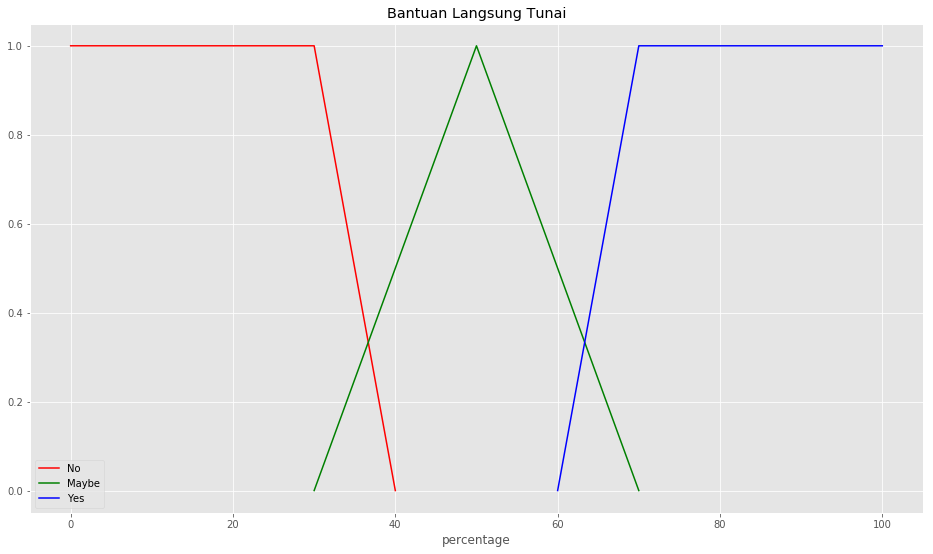

In [18]:
low_x=[0, 30, 40]
low_y=[1,1,0]

medium_x=[30,50,70]
medium_y=[0,1,0]

high_x=[60,70,100]
high_y=[0,1,1]


plt.plot(low_x,low_y, c='r', label="No")
plt.plot(medium_x,medium_y, c='g', label='Maybe')
plt.plot(high_x,high_y, c='b', label='Yes')
plt.title('Bantuan Langsung Tunai')
plt.xlabel('percentage')
plt.legend()

In [19]:
defuzzification = []

In [20]:
for a in range(len(inferenceresult)):
    result=0
    divider= 0
    for b in range(5):
        random = randint(0,100)
        if(random<=30):
            result =  result + 0
            divider- divider + 0
        elif((random>30) and (random<40)):
            result = result + (random * inferenceresult[a][0])
            divider =  divider + inferenceresult[a][0]
        elif((random>=40) and (random<40)):
            result = result + (random * inferenceresult[a][0])
            divider =  divider + inferenceresult[a][0]
        elif((random>=60) and (random<70)):
            result = result + (random * inferenceresult[a][0]) + (random * inferenceresult[a][2])
            divider =  divider + inferenceresult[a][0] + (random * inferenceresult[a][2])
        elif(random>=70):
            result = result + (random * inferenceresult[a][2])
            divider =  divider + inferenceresult[a][2]
    if(divider==0):
        defuzzification.append([a,0])
    else:
        defuzzification.append([result/divider])

In [21]:
finalresult = [x for _, x in sorted(zip(defuzzification, dtrain["No"]), reverse=True)]

In [22]:
finalresult[:20]

[95, 92, 99, 61, 52, 97, 32, 94, 9, 57, 77, 88, 44, 87, 66, 29, 18, 40, 39, 20]

In [23]:
report = pd.DataFrame({
    "No" : finalresult[:20],
})

In [24]:
report.to_csv('TebakanTugas2.csv',index = False)